In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt



In [15]:
listings = pd.read_csv("data/stockholm_listings.csv")
gdf_listings = gpd.GeoDataFrame(listings,crs={'init' :'epsg:4326'}, geometry=gpd.points_from_xy(listings.longitude, listings.latitude))
neighborhoods = gpd.read_file("data/stockholm_neighbourhoods.geojson")
gdf_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,145320,In the middle of it all - with a view!,703851,Kim,NaN,Södermalms,59.31364,18.05256,Private room,1272,2,72,2019-06-25,2.54,1,26,POINT (18.05256 59.31364)
1,155220,"Stockholm, new spacoius villa",746396,Madeleine,NaN,Skarpnäcks,59.24667,18.17799,Entire home/apt,1203,3,0,NaN,NaN,2,0,POINT (18.17799 59.24666999999999)
2,155685,Hornstull with water view!,748592,Robert,NaN,Södermalms,59.31535,18.03277,Entire home/apt,3209,4,22,2015-12-01,0.22,1,0,POINT (18.03277 59.31535)
3,164448,Double room in central Stockholm with Wi-Fi,784312,Li,NaN,Södermalms,59.31268,18.06258,Private room,597,3,311,2019-09-26,3.13,2,140,POINT (18.06258 59.31268000000001)
4,170651,Petit Charm Rooftop next to heaven,814021,Marie,NaN,Södermalms,59.31568,18.03138,Entire home/apt,734,3,33,2019-09-01,0.33,1,216,POINT (18.03138 59.31568000000001)


In [16]:
gdf_listings[["id", "name","host_name", "neighbourhood", 
              "latitude","longitude","room_type","price",
             "reviews_per_month", "geometry"]].head()

,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,reviews_per_month,geometry
0,145320,In the middle of it all - with a view!,Kim,Södermalms,59.31364,18.05256,Private room,1272,2.54,POINT (18.05256 59.31364)
1,155220,"Stockholm, new spacoius villa",Madeleine,Skarpnäcks,59.24667,18.17799,Entire home/apt,1203,NaN,POINT (18.17799 59.24666999999999)
2,155685,Hornstull with water view!,Robert,Södermalms,59.31535,18.03277,Entire home/apt,3209,0.22,POINT (18.03277 59.31535)
3,164448,Double room in central Stockholm with Wi-Fi,Li,Södermalms,59.31268,18.06258,Private room,597,3.13,POINT (18.06258 59.31268000000001)
4,170651,Petit Charm Rooftop next to heaven,Marie,Södermalms,59.31568,18.03138,Entire home/apt,734,0.33,POINT (18.03138 59.31568000000001)


In [17]:
gdf_listings["geometry"].isnull().sum()

0

In [18]:
neighborhoods.crs, gdf_listings.crs

({'init': 'epsg:4326'}, {'init': 'epsg:4326'})

In [19]:
#gdf_listings.crs = {'init' :'epsg:4326'}
#gdf_listings.to_file("data/gdf_listings.shp")

In [20]:

neighborhoods.head()

,neighbourhood,neighbourhood_group,geometry
0,Kungsholmens,None,"(POLYGON ((17.974196 59.313997, 17.97834 59.32..."
1,Östermalms,None,"(POLYGON ((18.037731 59.370618, 18.038503 59.3..."
2,Bromma,None,"(POLYGON ((17.864627 59.342946, 17.868475 59.3..."
3,Skärholmens,None,"(POLYGON ((17.863519 59.274675, 17.867794 59.2..."
4,Södermalms,None,"(POLYGON ((18.011419 59.322122, 18.015785 59.3..."


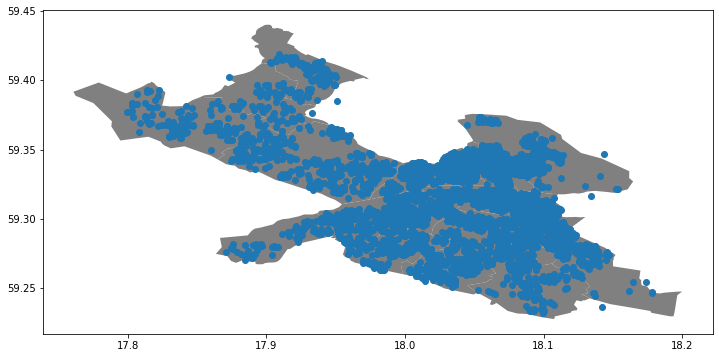

In [21]:
fig, ax = plt.subplots(figsize=(12,10))
neighborhoods.plot(color="Gray", ax= ax);
gdf_listings.plot(ax=ax)
#plt.savefig("neighbourhoods.png")

In [23]:
stockholm_areas = gpd.read_file("data/stockholm_areas.geojson")
stockholm_areas.head()

,fid,Deso,Total,KOMMUNNAMN,KATEGORI,ADAT,geometry
0,3705.0,0180C3410,1278.0,Eker?,Kommun,None,(POLYGON ((17.97999188283108 59.32127969085684...
1,5287.0,0180C4470,1783.0,Solna,Kommun,1912-12-12T12:00:00,(POLYGON ((18.01528743686829 59.34032113939811...
2,5288.0,0180C4730,2029.0,Solna,Kommun,1912-12-12T12:00:00,(POLYGON ((18.00307568049608 59.34115038366301...
3,5301.0,0180C4580,2254.0,Solna,Kommun,1912-12-12T12:00:00,(POLYGON ((17.99796832078351 59.34043477946468...
4,5302.0,0180C4600,1738.0,Solna,Kommun,1912-12-12T12:00:00,(POLYGON ((18.01504636950888 59.34041562176383...


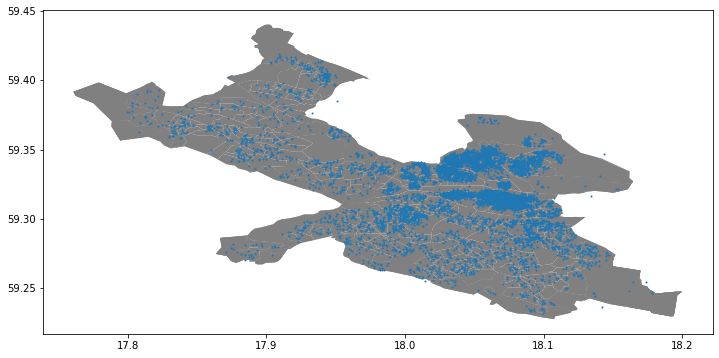

In [26]:
fig, ax = plt.subplots(figsize=(12,10))
stockholm_areas.plot(color="Gray", ax= ax);
gdf_listings.plot(ax=ax, markersize=1)
#plt.savefig("neighbourhoods.png")

In [28]:
stockholm_areas.crs, gdf_listings.crs

({'init': 'epsg:4326'}, {'init': 'epsg:4326'})

In [29]:
sjoined_listings = gpd.sjoin(gdf_listings, stockholm_areas, op="within")

In [30]:
sjoined_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,geometry,index_right,fid,Deso,Total,KOMMUNNAMN,KATEGORI,ADAT
0,145320,In the middle of it all - with a view!,703851,Kim,NaN,Södermalms,59.31364,18.05256,Private room,1272,...,1,26,POINT (18.05256 59.31364),44,6156.0,0180C3310,1543.0,Stockholm,Kommun,None
911,5612474,Best location in Stockholm on Söder,27584743,Liv,NaN,Södermalms,59.31228,18.05465,Entire home/apt,1448,...,1,0,POINT (18.05465 59.31228),44,6156.0,0180C3310,1543.0,Stockholm,Kommun,None
1359,6829836,Quiet place by the park Tantolunden,18177484,Jörgen,NaN,Södermalms,59.31317,18.05321,Entire home/apt,910,...,1,0,POINT (18.05321 59.31316999999999),44,6156.0,0180C3310,1543.0,Stockholm,Kommun,None
2414,12718370,Cozy Södermalm apartment with a view,5287593,Erika,NaN,Södermalms,59.31269,18.05461,Entire home/apt,685,...,1,0,POINT (18.05461 59.31269),44,6156.0,0180C3310,1543.0,Stockholm,Kommun,None
2584,13123672,Cozy apartment in the middle of Södermalm,12892927,Selma,NaN,Södermalms,59.31347,18.05291,Entire home/apt,949,...,1,0,POINT (18.05291 59.31347),44,6156.0,0180C3310,1543.0,Stockholm,Kommun,None


In [32]:
sjoined_listings[["name","host_name", "neighbourhood", 
              "room_type","price", "reviews_per_month", 
               "Deso","Total", "KOMMUNNAMN", "Deso", "Total","geometry"]].sample(5)

,name,host_name,neighbourhood,room_type,price,reviews_per_month,Deso,Total,KOMMUNNAMN,Deso,Total,geometry
202,"Modern apartment in SOFO, Södermalm",Alexandra,Södermalms,Entire home/apt,900,0.34,0180C3290,1517.0,Stockholm,0180C3290,1517.0,POINT (18.08336 59.31144)
3978,"Nice apartment, 68m2, perfect for families",Svea,Södermalms,Entire home/apt,704,NaN,0180C3350,1963.0,Stockholm,0180C3350,1963.0,POINT (18.05863 59.31258)
4825,Beautiful little atelier-apartment in Hornstull,Isabelle,Södermalms,Entire home/apt,695,0.92,0180C3630,1439.0,Stockholm,0180C3630,1439.0,POINT (18.02849 59.31791)
6998,Apartment by the nature 18min from the central,Shaon,Skarpnäcks,Private room,548,0.75,0180C1800,1362.0,Stockholm,0180C1800,1362.0,POINT (18.12444 59.27445)
2219,Enjoy artwork in cosy apartement near the city,Cecilia,Skarpnäcks,Entire home/apt,597,0.19,0180C1750,1576.0,Stockholm,0180C1750,1576.0,POINT (18.1345 59.27635)


In [37]:
grouped = sjoined_listings.groupby("Deso").size()
df = grouped.to_frame().reset_index()
df.columns = ['Deso', 'listings_count']
df.head()

,Deso,listings_count
0,0123C1090,2
1,0180C1010,2
2,0180C1020,4
3,0180C1030,16
4,0180C1040,6


In [39]:
merged_areas = stockholm_areas.merge(df, on='Deso', how='outer')
merged_areas.head()

,fid,Deso,Total,KOMMUNNAMN,KATEGORI,ADAT,geometry,listings_count
0,3705.0,0180C3410,1278.0,Eker?,Kommun,None,(POLYGON ((17.97999188283108 59.32127969085684...,12.0
1,6307.0,0180C3410,1278.0,Stockholm,Kommun,None,(POLYGON ((17.97999188283108 59.32127969085684...,12.0
2,5287.0,0180C4470,1783.0,Solna,Kommun,1912-12-12T12:00:00,(POLYGON ((18.01528743686829 59.34032113939811...,60.0
3,6050.0,0180C4470,1783.0,Stockholm,Kommun,None,(POLYGON ((18.01528743686829 59.34032113939811...,60.0
4,5288.0,0180C4730,2029.0,Solna,Kommun,1912-12-12T12:00:00,(POLYGON ((18.00307568049608 59.34115038366301...,28.0


In [43]:
merged_areas.shape, stockholm_areas.shape

((787, 8), (787, 7))

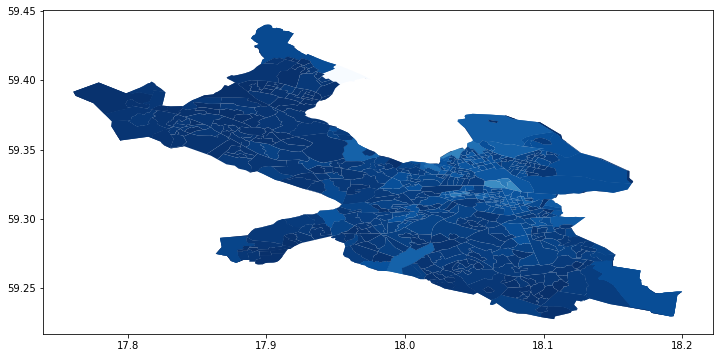

In [48]:
merged_areas.plot(column="listings_count", cmap="Blues_r", figsize=(12,10));

In [49]:
#merged_areas.to_file("data/merged_areas.shp")